In [1]:
import os

In [2]:
data_dir = '' #Dataset directory

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [5]:
from matplotlib.image import imread

Finding images

In [6]:
test_path = data_dir + '\\test\\'
train_path = data_dir + '\\train\\'

In [7]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [8]:
para_cell = imread(train_path+'parasitized\\'+os.listdir(train_path+'parasitized')[0])
unin_cell = imread(train_path+'uninfected\\'+os.listdir(train_path+'uninfected')[0])

In [9]:
len(os.listdir(train_path+'parasitized')),len(os.listdir(test_path+'uninfected'))

(12480, 1300)

Image dimension study

In [10]:
df = pd.DataFrame()

In [11]:
for image in os.listdir(test_path+'parasitized'):
    img_shape = imread(test_path+'parasitized\\'+image).shape
    df = df.append(pd.Series(img_shape),ignore_index=True)

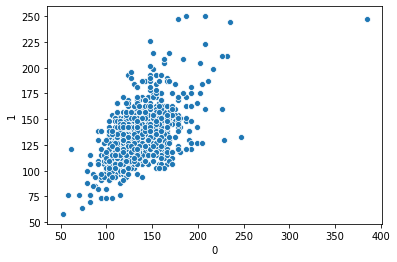

In [12]:
sns.scatterplot(x=df[0],y=df[1])

In [13]:
df.describe() #Considering mean image dimensions for data points

,0,1,2
count,1300.000000,1300.000000,1300.0
mean,134.643077,133.318462,3.0
std,22.906685,21.707059,0.0
min,52.000000,58.000000,3.0
25%,121.000000,121.000000,3.0
50%,133.000000,133.000000,3.0
75%,148.000000,145.000000,3.0
max,385.000000,250.000000,3.0


Image Generator

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                               shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

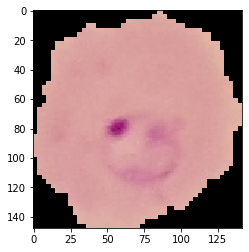

In [16]:
plt.imshow(para_cell)

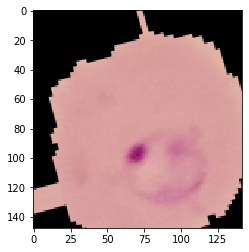

In [17]:
plt.imshow(image_gen.random_transform(para_cell))

Model building

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [20]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(133,133,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(133,133,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(133,133,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 131, 131, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 65, 65, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [24]:
batch_size=16

In [25]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(133,133),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [26]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(133,133),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle=False)

Found 2600 images belonging to 2 classes.


In [27]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [28]:
result = model.fit_generator(train_image_gen,
                            epochs=20,
                            validation_data=test_image_gen,
                            callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 472s 302ms/step - loss: 0.8546 - acc: 0.5482 - val_loss: 0.6824 - val_acc: 0.5738
Epoch 2/20
1560/1560 [==============================] - 406s 260ms/step - loss: 0.6813 - acc: 0.5774 - val_loss: 0.6802 - val_acc: 0.5769
Epoch 3/20
1560/1560 [==============================] - 417s 267ms/step - loss: 0.6727 - acc: 0.5930 - val_loss: 0.6807 - val_acc: 0.5877
Epoch 4/20
1560/1560 [==============================] - 405s 259ms/step - loss: 0.4434 - acc: 0.7816 - val_loss: 0.2020 - val_acc: 0.9327
Epoch 5/20
1560/1560 [==============================] - 414s 265ms/step - loss: 0.1925 - acc: 0.9385 - val_loss: 0.2010 - val_acc: 0.9358
Epoch 6/20
1560/1560 [==============================] - 418s 268ms/step - loss: 0.1896 - acc: 0.9421 - val_loss: 0.1989 - val_acc: 0.9346
Epoch 7/20
1560/1560 [==============================] - 410s 263ms/step - loss: 0.1826 - acc: 0.9441 - val_loss: 0.1778 - val_acc: 0.9408
Epoch 8/20
1560/1560 [============

In [29]:
model.history.history

{'loss': [0.8546617815763735,
  0.681250114420475,
  0.672716036764931,
  0.4433328738848515,
  0.19254996996187554,
  0.1896191156591009,
  0.18260653199535004,
  0.1824345895274966,
  0.17303017700666112,
  0.1796296867234115,
  0.1767834766222141],
 'acc': [0.5481609,
  0.57737,
  0.5930363,
  0.78163314,
  0.93849665,
  0.9421428,
  0.94406605,
  0.94294417,
  0.94442666,
  0.94478726,
  0.9465502],
 'val_loss': [0.6823655414435029,
  0.6802470947335835,
  0.6806647538041776,
  0.20204161809745924,
  0.20102982165111927,
  0.19893066849319574,
  0.17784425226594408,
  0.20636149163306491,
  0.17640053396016084,
  0.18661388980818946,
  0.18409140202348218],
 'val_acc': [0.57384616,
  0.5769231,
  0.5876923,
  0.9326923,
  0.93576926,
  0.9346154,
  0.94076926,
  0.9323077,
  0.9453846,
  0.94346154,
  0.9419231]}

In [30]:
model.evaluate_generator(test_image_gen)

[0.18648456035901798, 0.9430769]

In [31]:
pred = model.predict_generator(test_image_gen)

In [32]:
predictions = pred > 0.5

In [33]:
len(pred)

2600

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1183,  117],
       [  44, 1256]], dtype=int64)